In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05, focal loss gamma 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.3486	Val Loss:	0.8856	Accuracy:	0.7479	F1:	0.7352
2 / 30: Train Loss:	0.8087	Val Loss:	0.6695	Accuracy:	0.7731	F1:	0.7711
3 / 30: Train Loss:	0.3032	Val Loss:	0.6003	Accuracy:	0.7983	F1:	0.7923
4 / 30: Train Loss:	0.0970	Val Loss:	0.7044	Accuracy:	0.7311	F1:	0.7262
5 / 30: Train Loss:	0.2111	Val Loss:	0.5545	Accuracy:	0.8067	F1:	0.8077
6 / 30: Train Loss:	0.2191	Val Loss:	0.7760	Accuracy:	0.6891	F1:	0.6845
7 / 30: Train Loss:	0.1121	Val Loss:	0.6424	Accuracy:	0.7647	F1:	0.7603
8 / 30: Train Loss:	0.0550	Val Loss:	0.7583	Accuracy:	0.7227	F1:	0.7163
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.79      0.87      0.82        38
oversimplification       0.85      0.78      0.81        36
slothful induction       0.80      0.78      0.79        45

          accuracy                           0.81       119
         macro avg       0.81     

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5897	Val Loss:	0.9169	Accuracy:	0.7647	F1:	0.7588
2 / 30: Train Loss:	0.3433	Val Loss:	0.7331	Accuracy:	0.7815	F1:	0.7805
3 / 30: Train Loss:	0.1239	Val Loss:	0.6993	Accuracy:	0.7479	F1:	0.7402
4 / 30: Train Loss:	0.0556	Val Loss:	0.7233	Accuracy:	0.7563	F1:	0.7475
5 / 30: Train Loss:	0.1414	Val Loss:	0.6378	Accuracy:	0.7983	F1:	0.7981
6 / 30: Train Loss:	0.0991	Val Loss:	0.6958	Accuracy:	0.7395	F1:	0.7306
7 / 30: Train Loss:	0.0387	Val Loss:	0.5812	Accuracy:	0.7899	F1:	0.7917
8 / 30: Train Loss:	0.0110	Val Loss:	0.5750	Accuracy:	0.8151	F1:	0.8169
9 / 30: Train Loss:	0.0036	Val Loss:	0.5498	Accuracy:	0.8151	F1:	0.8158
10 / 30: Train Loss:	0.0027	Val Loss:	0.5561	Accuracy:	0.8319	F1:	0.8308
11 / 30: Train Loss:	0.0018	Val Loss:	0.5575	Accuracy:	0.8319	F1:	0.8308
12 / 30: Train Loss:	0.0006	Val Loss:	0.5563	Accuracy:	0.8319	F1:	0.8308
13 / 30: Train Loss:	0.0006	Val Loss:	0.5564	Accuracy:	0.8319	F1:	0.8308
No improvement for 3 epochs. Stopping early.
best (higgest m

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1382	Val Loss:	1.0311	Accuracy:	0.5462	F1:	0.5276
2 / 30: Train Loss:	0.0853	Val Loss:	0.8664	Accuracy:	0.7563	F1:	0.7514
3 / 30: Train Loss:	0.0386	Val Loss:	0.7712	Accuracy:	0.7815	F1:	0.7691
4 / 30: Train Loss:	0.0236	Val Loss:	0.7735	Accuracy:	0.7395	F1:	0.7332
5 / 30: Train Loss:	0.0301	Val Loss:	0.7139	Accuracy:	0.7815	F1:	0.7808
6 / 30: Train Loss:	0.0243	Val Loss:	0.7643	Accuracy:	0.7143	F1:	0.7019
7 / 30: Train Loss:	0.0098	Val Loss:	0.7103	Accuracy:	0.8067	F1:	0.8061
8 / 30: Train Loss:	0.0039	Val Loss:	0.7442	Accuracy:	0.6975	F1:	0.6839
9 / 30: Train Loss:	0.0033	Val Loss:	0.6406	Accuracy:	0.8151	F1:	0.8154
10 / 30: Train Loss:	0.0008	Val Loss:	0.6534	Accuracy:	0.7395	F1:	0.7346
11 / 30: Train Loss:	0.0003	Val Loss:	0.6265	Accuracy:	0.7899	F1:	0.7909
12 / 30: Train Loss:	0.0002	Val Loss:	0.6178	Accuracy:	0.7983	F1:	0.7988
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0087	Val Loss:	1.0620	Accuracy:	0.4874	F1:	0.3999
2 / 30: Train Loss:	0.0042	Val Loss:	1.0170	Accuracy:	0.7395	F1:	0.7308
3 / 30: Train Loss:	0.0029	Val Loss:	0.9496	Accuracy:	0.6891	F1:	0.6763
4 / 30: Train Loss:	0.0014	Val Loss:	0.8837	Accuracy:	0.7479	F1:	0.7362
5 / 30: Train Loss:	0.0013	Val Loss:	0.8423	Accuracy:	0.7479	F1:	0.7440
6 / 30: Train Loss:	0.0007	Val Loss:	0.8398	Accuracy:	0.7731	F1:	0.7722
7 / 30: Train Loss:	0.0006	Val Loss:	0.8170	Accuracy:	0.7479	F1:	0.7416
8 / 30: Train Loss:	0.0003	Val Loss:	0.8000	Accuracy:	0.7647	F1:	0.7650
9 / 30: Train Loss:	0.0004	Val Loss:	0.8048	Accuracy:	0.7479	F1:	0.7478
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.71      0.84      0.77        38
oversimplification       0.96      0.64      0.77        36
slothful induction       0.74      0.82      0.78        45

          accuracy    

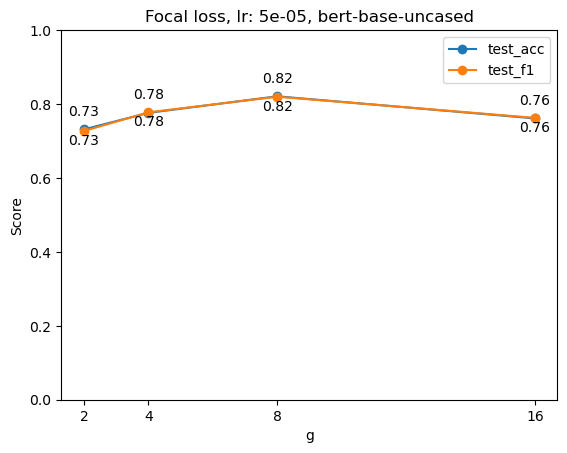

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f